In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as date
import dataquality as dq #This is library with methods I wrote for basic data quality checks. 
                        #It includes checking for nulls, duplicates, as well as the shape of the data (rows and columns),
                        #And high-level summary statistics (avg, stdev, IQR, etc)
                        #I have included this .py file in my email submission so that you can run this library.

In [11]:
# Create dataframe and import 'total ridership' table
total_ridership = pd.read_csv("total-ridership.csv")
total_ridership.head()

,route_id,date,riders,is_fare_free
0,G87,2022-06-01,19716,False
1,G87,2022-06-02,18907,False
2,G87,2022-06-03,22091,False
3,G87,2022-06-04,12488,False
4,G87,2022-06-05,10407,False


### Top 5 Rows



,route_id,date,riders,is_fare_free
0,G87,2022-06-01,19716,False
1,G87,2022-06-02,18907,False
2,G87,2022-06-03,22091,False
3,G87,2022-06-04,12488,False
4,G87,2022-06-05,10407,False


### Bottom 5 Rows



,route_id,date,riders,is_fare_free
129382,C101,2024-05-16,1553,False
129383,C101,2024-05-17,1405,False
129384,C101,2024-05-20,1316,False
129385,C101,2024-05-21,1476,False
129386,C101,2024-05-22,1550,False


### Info



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129387 entries, 0 to 129386
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   route_id      129387 non-null  object
 1   date          129387 non-null  object
 2   riders        129387 non-null  int64 
 3   is_fare_free  129387 non-null  bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 3.1+ MB


None

### Duplicates



0

### Missing



route_id        0
date            0
riders          0
is_fare_free    0
dtype: int64

### Unique



route_id          184
date              722
riders          24836
is_fare_free        2
dtype: int64

,riders
count,129387.000000
mean,8151.737331
std,6760.400447
min,2.000000
25%,3210.000000
50%,6704.000000
75%,11099.500000
max,52783.000000


### Charts



,index,0
0,route_id,184
1,date,722
2,riders,24836
3,is_fare_free,2


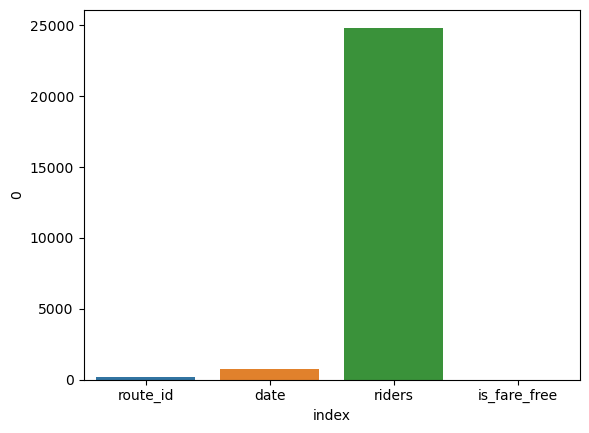

In [9]:
dq.data_check(total_ridership) #No nulls or duplicates, looking good to proceed

In [5]:
# Create dataframe and import 'paid ridership' table
paid_ridership = pd.read_csv("paid-ridership.csv")
paid_ridership.head()

,route_id,timestamp,paid_riders
0,G87,2022-06-01 00:00:00,34
1,G87,2022-06-01 01:00:00,24
2,G87,2022-06-01 02:00:00,15
3,G87,2022-06-01 03:00:00,3
4,G87,2022-06-01 04:00:00,30


### Top 5 Rows



,route_id,timestamp,paid_riders
0,G87,2022-06-01 00:00:00,34
1,G87,2022-06-01 01:00:00,24
2,G87,2022-06-01 02:00:00,15
3,G87,2022-06-01 03:00:00,3
4,G87,2022-06-01 04:00:00,30


### Bottom 5 Rows



,route_id,timestamp,paid_riders
2734804,C101,2024-05-22 18:00:00,143
2734805,C101,2024-05-22 19:00:00,117
2734806,C101,2024-05-22 20:00:00,63
2734807,C101,2024-05-22 21:00:00,14
2734808,C101,2024-05-22 22:00:00,1


### Info



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734809 entries, 0 to 2734808
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   route_id     object
 1   timestamp    object
 2   paid_riders  int64 
dtypes: int64(1), object(2)
memory usage: 62.6+ MB


None

### Duplicates



0

### Missing



route_id       0
timestamp      0
paid_riders    0
dtype: int64

### Unique



route_id         184
timestamp      17329
paid_riders     3479
dtype: int64

,paid_riders
count,2.734809e+06
mean,3.256351e+02
std,3.639701e+02
min,1.000000e+00
25%,6.900000e+01
50%,1.990000e+02
75%,4.610000e+02
max,4.576000e+03


### Charts



,index,0
0,route_id,184
1,timestamp,17329
2,paid_riders,3479


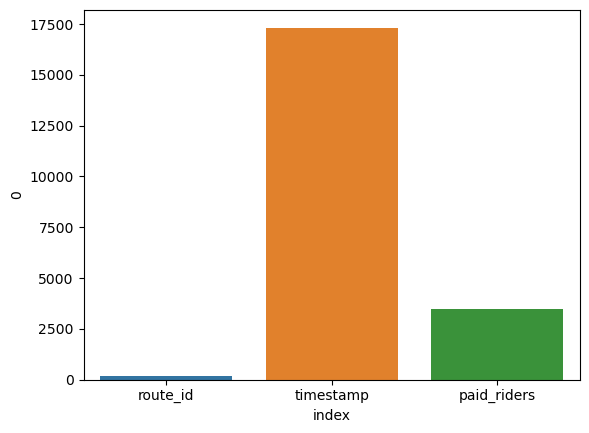

In [19]:
dq.data_check(paid_ridership) #No nulls or duplicates, looking good to proceed

In [21]:
import pandasql as psql
from pandasql import sqldf 
#Let's query our data in an easy, efficient way

In [33]:
# Let's get the average ridership for non-affected routes, prior to 9/24/2023
Pre_Free_Non_Affected_Ridership = sqldf('''select route_id, round(avg(riders),2) as avg_ridership, is_fare_free from total_ridership
where date < '2023-09-24' and is_fare_free = 0
and route_id not in ('A13','S87','U43','U52','W64')
group by route_id''')
Pre_Free_Non_Affected_Ridership.head()

,route_id,avg_ridership,is_fare_free
0,C1,9098.59,0
1,C101,1318.68,0
2,C102,2265.11,0
3,C116,3205.88,0
4,C124,19702.22,0


In [39]:
# Lets get the average ridership for affected routes, prior to 9/24/2023
Pre_Free_Affected_Ridership = sqldf('''select route_id, round(avg(riders),2) as avg_ridership, is_fare_free from total_ridership tr 
where date < '2023-09-24' and is_fare_free = 0
and route_id in ('A13','S87','U43','U52','W64')
group by route_id''')
Pre_Free_Affected_Ridership.head()

,route_id,avg_ridership,is_fare_free
0,A13,6533.08,0
1,S87,1070.64,0
2,U43,8380.06,0
3,U52,8005.77,0
4,W64,9386.23,0


In [41]:
# Let's get average ridership for non-affected routes, after 9/24/2023
Post_Free_Non_Affected_Ridership = sqldf('''
select route_id,round(avg(riders),2) as avg_ridership, is_fare_free from total_ridership tr 
where date >= '2023-09-24' and is_fare_free = 0
and route_id not in ('A13','S87','U43','U52','W64')
group by route_id 
''')
Post_Free_Non_Affected_Ridership.head()

,route_id,avg_ridership,is_fare_free
0,C1,10277.60,0
1,C101,1416.68,0
2,C102,2512.80,0
3,C116,3476.45,0
4,C124,20262.61,0


In [191]:
# Let's get average ridership for affected routes, after 9/24/2023
Post_Free_Affected_Ridership = sqldf('''
select route_id,round(avg(riders),2) as avg_ridership, is_fare_free from total_ridership tr 
where date >= '2023-09-24' and is_fare_free = 1
group by route_id  
''')
Post_Free_Affected_Ridership.head()

,route_id,avg_ridership,is_fare_free
0,A13,8660.07,1
1,S87,1160.96,1
2,U43,11638.04,1
3,U52,11239.57,1
4,W64,12811.40,1


In [71]:
#Let's calculate the change in avg ridership for non-affected routes, using two of our queries from above
Avg_Change_In_NonAffected_Ridership = sqldf('''
with changes_in_non_free_ridership as(
select pfna.route_id as route_id, 
pfna.avg_ridership, ppfna.avg_ridership, 
(pfna.avg_ridership-ppfna.avg_ridership) as change_in_avg_ridership
from Post_Free_Non_Affected_Ridership pfna
inner join Pre_Free_Non_Affected_Ridership ppfna on ppfna.route_id = pfna.route_id
)
select avg(change_in_avg_ridership)
from changes_in_non_free_ridership
''')
Avg_Change_In_NonAffected_Ridership #This gives our avg change in ridership pre and post free


,avg(change_in_avg_ridership)
0,555.405307


In [181]:
#Let's calculate the change in avg ridership for affected routes, using two of our queries from above

Avg_Change_In_Affected_Ridership = sqldf('''
with changes_in_free_ridership as(
select pfar.route_id as route_id, 
pfar.avg_ridership, ppfar.avg_ridership,
(pfar.avg_ridership - ppfar.avg_ridership) as change_in_avg_ridership
from Post_Free_Affected_Ridership pfar
inner join Pre_Free_Affected_Ridership ppfar on ppfar.route_id = pfar.route_id
)
select avg(change_in_avg_ridership)
from changes_in_free_ridership
''') 
Avg_Change_In_Affected_Ridership #This gives our avg change in ridership pre and post free for affected routes

,avg(change_in_avg_ridership)
0,2426.852


In [183]:
print("The Average Change in Ridership on Routes not made Free is:",Avg_Change_In_NonAffected_Ridership)
print("The Average Change in Ridership on Routes made Free is:", Avg_Change_In_Affected_Ridership)
#Note that the avg change in ridership on routes made free is nearly 5x the change in ridership on routes not made free!

The Average Change in Ridership on Routes not made Free is:    avg(change_in_avg_ridership)
0                    555.405307
The Average Change in Ridership on Routes made Free is:    avg(change_in_avg_ridership)
0                      2426.852


In [163]:
# In order to graph our results, let's calculate the average ridership (over all routes) in each of our 4 categories- this will be used to make graphing easier.
# We use the 'avg_ridership' column from our SQL queries above and calculate the mean of this value for each of our 4 categories

Non_Affected_Pre_Free_Avg = Pre_Free_Non_Affected_Ridership['avg_ridership'].mean() # Takes the average of the avg ridership (across all routes) from our query
Non_Affected_Post_Free_Avg = Post_Free_Non_Affected_Ridership['avg_ridership'].mean()
Affected_Pre_Free_Avg = Pre_Free_Affected_Ridership['avg_ridership'].mean()
Affected_Post_Free_Avg = Post_Free_Affected_Ridership['avg_ridership'].mean()

# Test
print("Non-Affected Pre-Free Avg:", Non_Affected_Pre_Free_Avg)
print("Non-Affected Post-Free Avg:", Non_Affected_Post_Free_Avg)
print("Affected Pre-Free Avg:", Affected_Pre_Free_Avg)
print("Affected Post-Free Avg:", Affected_Post_Free_Avg)

# Looks good (numbers look to be within expected ranges, and consistent with our results from Cell 183)

Non-Affected Pre-Free Avg: 7805.552402234637
Non-Affected Post-Free Avg: 8360.957709497208
Affected Pre-Free Avg: 6675.156
Affected Post-Free Avg: 9102.008


In [215]:
# Let's tabulate the results from the previous cell, using a dictionary and dataframe
table_data = {
'Pre-Free Fare': [Non_Affected_Pre_Free_Avg, Affected_Pre_Free_Avg],
'Post-Free Fare': [Non_Affected_Post_Free_Avg,Affected_Post_Free_Avg],
'Difference': [(Non_Affected_Post_Free_Avg - Non_Affected_Pre_Free_Avg),(Affected_Post_Free_Avg - Affected_Pre_Free_Avg)]
}

table = pd.DataFrame(table_data, index = ['Non-Affected Routes', 'Affected Routes'])
print(table)

                     Pre-Free Fare  Post-Free Fare   Difference
Non-Affected Routes    7805.552402     8360.957709   555.405307
Affected Routes        6675.156000     9102.008000  2426.852000


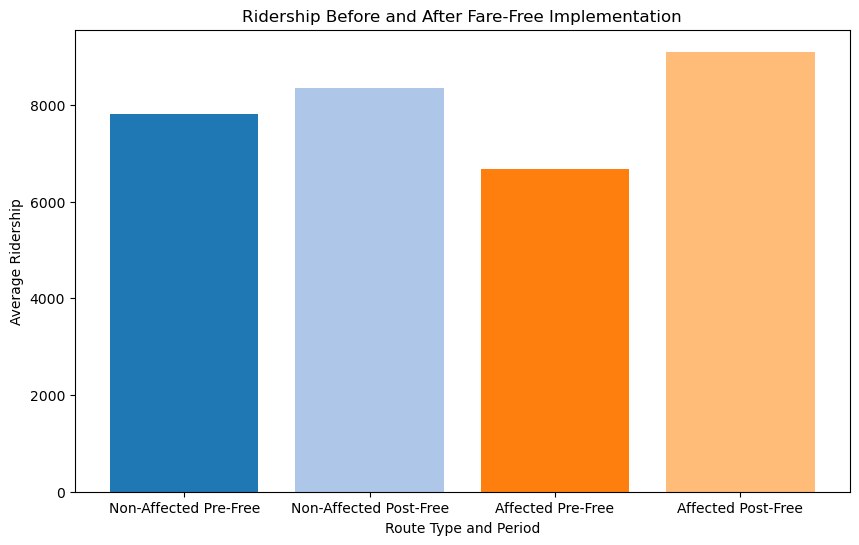

In [173]:
# Now, let's combine the results of our queries into a new dataframe so that we can graph our results


# Similar to above, let's create a dictionary to map our x and y values to single variables, using the averages calculated above
graphing_data = {
'Route_Type': ['Non-Affected Pre-Free', 'Non-Affected Post-Free', 'Affected Pre-Free', 'Affected Post-Free'],
'Avg_Ridership': [
Non_Affected_Pre_Free_Avg,  
Non_Affected_Post_Free_Avg,  
Affected_Pre_Free_Avg,     
Affected_Post_Free_Avg      
]
}

# Create DataFrame and load the data from the dictionary created above
graph_data_frame = pd.DataFrame(graphing_data)

# Googled a nice color palette for this 
color_palette = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78']


plt.figure(figsize = (10, 6))
plt.bar(graph_data_frame['Route_Type'], graph_data_frame['Avg_Ridership'], color = color_palette)


plt.xlabel('Route Type and Period')
plt.ylabel('Average Ridership')
plt.title('Ridership Before and After Fare-Free Implementation')

plt.show()
# Note the significantly larger increase in ridership on affected routes than non-affected routes.
# This is consistent with our results from Cell 183.

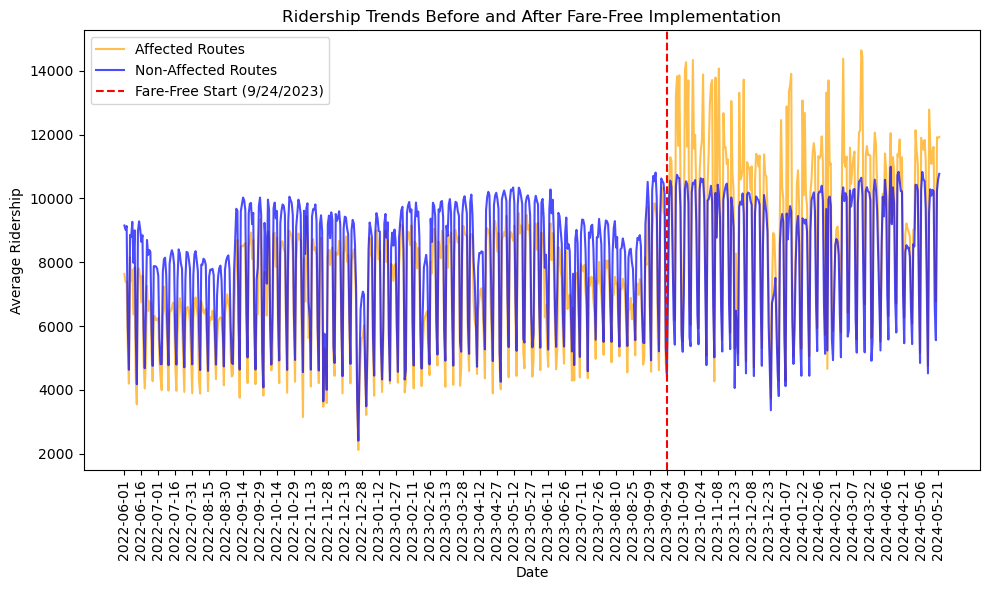

In [187]:
# Now, let's make a double line graph with data for both affected and non-affected routes
# Let's also include an indication line for when the free fare program started
# Our raw data is already in a suitable format to graph so we don't need to create a new dataframe here. 

# Filter data for affected and non-affected routes
affected_routes = total_ridership[total_ridership['route_id'].isin(['A13', 'S87', 'U43', 'U52', 'W64'])]
non_affected_routes = total_ridership[~total_ridership['route_id'].isin(['A13', 'S87', 'U43', 'U52', 'W64'])]

# Aggregate daily avg for each group
affected = affected_routes.groupby('date')['riders'].mean().reset_index() #Avg riders across all affected routes on a given day
non_affected = non_affected_routes.groupby('date')['riders'].mean().reset_index() #Avg riders across all non-affected routes on a given day


# Plot
plt.figure(figsize = (10, 6))
plt.plot(affected['date'], affected['riders'], label = 'Affected Routes', color = 'orange', alpha = 0.7)
plt.plot(non_affected['date'], non_affected['riders'], label = 'Non-Affected Routes', color = 'blue', alpha = 0.7)



# Add a vertical line for 9/24/2023 (converted to string)
fare_free_date = pd.to_datetime('2023-09-24').strftime('%Y-%m-%d')
plt.axvline(fare_free_date, color = 'red', linestyle = '--', label = 'Fare-Free Start (9/24/2023)')

# Labels and such
plt.xlabel('Date')
plt.ylabel('Average Ridership')
plt.title('Ridership Trends Before and After Fare-Free Implementation')
plt.legend()
plt.xticks(affected['date'][::15], rotation = 90) #Create an interval (every two weeks) for x-ticks so we don't have hundreds of dates 
plt.tight_layout()



plt.show()



In [239]:
affected


,date,riders
0,2022-06-01,7634.20
1,2022-06-02,7385.60
2,2022-06-03,7397.00
3,2022-06-04,5338.00
4,2022-06-05,4194.75
...,...,...
717,2024-05-18,8452.50
718,2024-05-19,6771.75
719,2024-05-20,11919.60
720,2024-05-21,11896.20
